# Imersão dados

### Tratamento de dados e primeiros gráficos

In [129]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [130]:
dados["Valor"][0].split()

['R$', '7.000.000']

In [131]:
dados["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [132]:
dados["Valor"].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [133]:
len(dados["Valor"].str.split(expand=True)[1].unique())

1038

In [134]:
dados[["moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand=True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [135]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [136]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [137]:
dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)

C:\Users\thiag\AppData\Local\Temp\ipykernel_11432\2927155442.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)


0       7000000.00
1       3700000.00
2        380000.00
3        685000.00
4        540000.00
           ...    
10002   1500000.00
10003    665000.00
10004   2300000.00
10005   1050000.00
10007    270000.00
Name: Valor_anuncio, Length: 9156, dtype: float64

In [138]:
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


C:\Users\thiag\AppData\Local\Temp\ipykernel_11432\2747665508.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)
C:\Users\thiag\AppData\Local\Temp\ipykernel_11432\2747665508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float)


<AxesSubplot:ylabel='Frequency'>

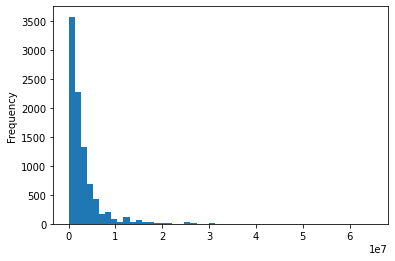

In [139]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

In [140]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [141]:
pd.set_option("display.precision", 2)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [142]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
dados_vendas.describe(include="all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [144]:
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


```bash
pip install seaborn
```

Calculou automaticamente os numeros de bins sem precisar setar

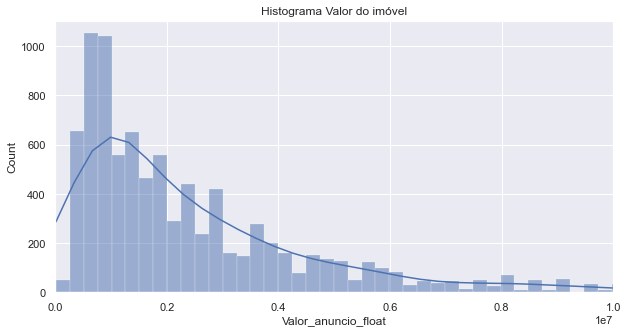

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10, 5))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde=True)
ax.set_title("Histograma Valor do imóvel")
plt.xlim((-50, 10000000))
plt.show()